In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [8]:
stonks = pd.read_csv('stock_data.csv')
stonks.Date=pd.to_datetime(stonks.Date)
stonks.set_index(stonks.Date,inplace=True)
stonks.drop(columns=['Unnamed: 0','Date'],inplace=True)
stonks.head()


,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


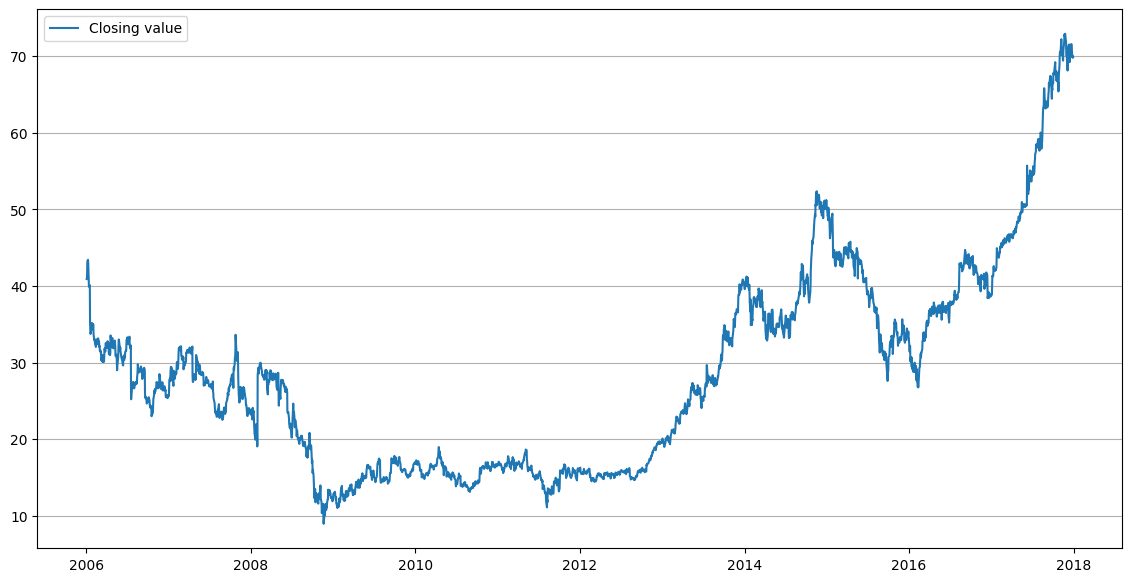

In [9]:
plt.figure(figsize=(14,7))
plt.plot(stonks.Close,label='Closing value')
plt.legend()
plt.grid(axis='y')
plt.show()

In [49]:
stonks2 = stonks.resample('ME').mean('Close')
print(stonks.loc['2006-01-31'])
print(stonks2.loc['2006-01-31'])

Open          35.2
High          35.2
Low          34.31
Close        34.38
Volume    36538014
Name          AABA
Name: 2006-01-31 00:00:00, dtype: object
Open      3.824550e+01
High      3.869400e+01
Low       3.764150e+01
Close     3.811300e+01
Volume    3.400594e+07
Name: 2006-01-31 00:00:00, dtype: float64


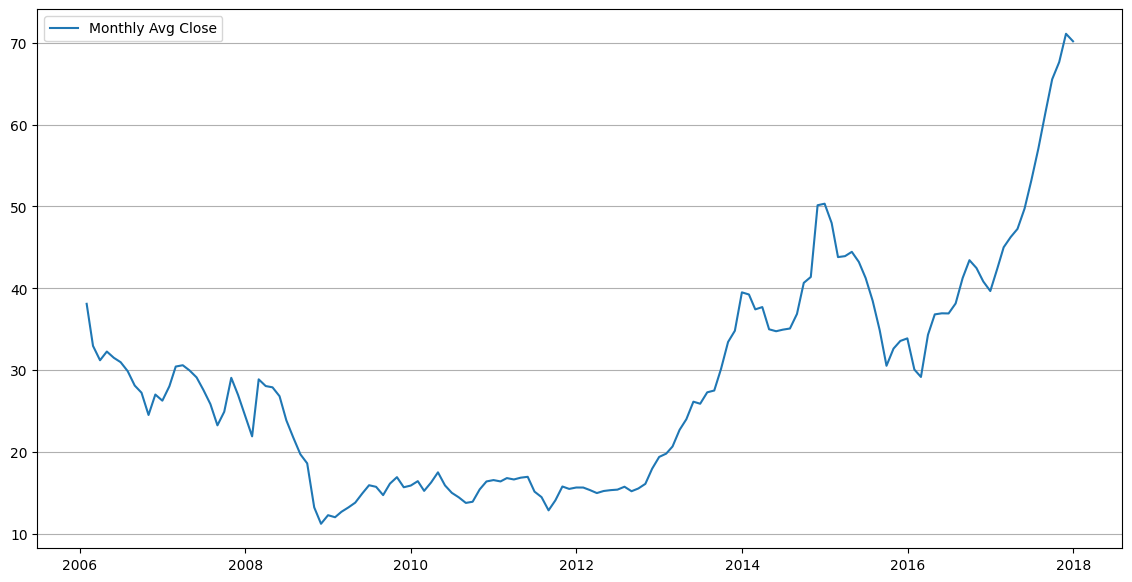

In [137]:
plt.figure(figsize=(14,7))
plt.plot(stonks2.Close,label='Monthly Avg Close')
plt.legend()
plt.grid(axis='y')
plt.show()

In [148]:
corrs=np.array([stonks2.Volume.autocorr(lag=i) for i in range(48)])

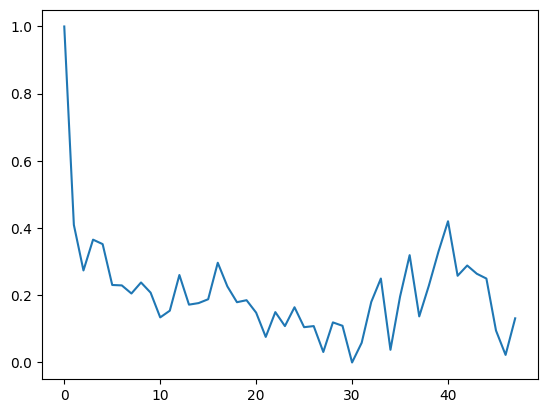

In [149]:
plt.plot(list(range(48)),corrs)
plt.show()

In [37]:
lnretns = pd.DataFrame(np.array([np.log(stonks.Close.iloc[n]/stonks.Close.iloc[n-1]) for n in range(1,len(stonks))]),columns=['returns'],index=stonks.index[1:])

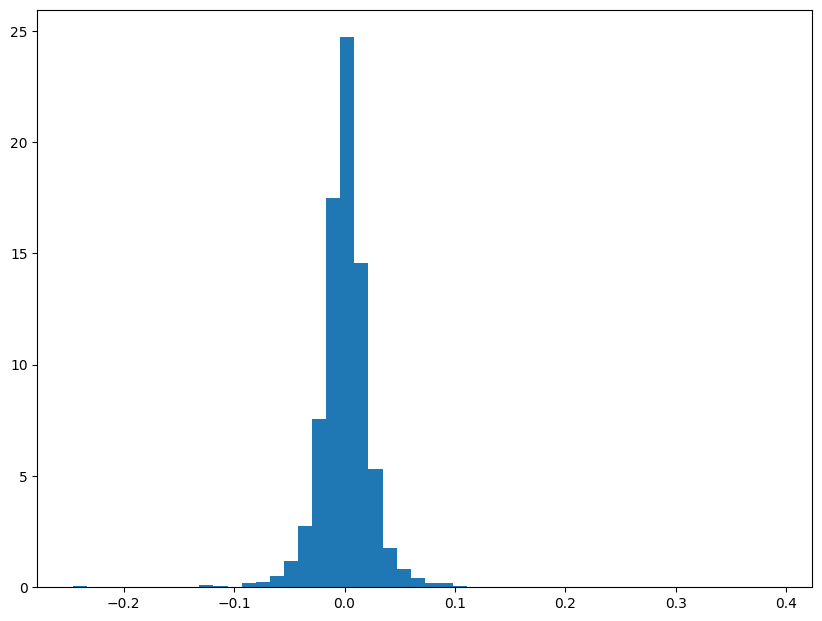

In [44]:
plt.figure(figsize=(10,7.5))
plt.hist(lnretns,bins=50,density=True)
plt.show()

In [47]:
lnmean= np.mean(lnretns['returns'])
vol = np.std(lnretns['returns'])

print(lnmean, vol)

0.0001772616148978342 0.02403055044236512


In [48]:
type(lnretns['returns'])

pandas.core.series.Series

In [50]:
monthly = pd.DataFrame(np.array([np.log(stonks2.Close.iloc[n]/stonks2.Close.iloc[n-1]) for n in range(1,len(stonks2))]),columns=['returns'],index=stonks2.index[1:])

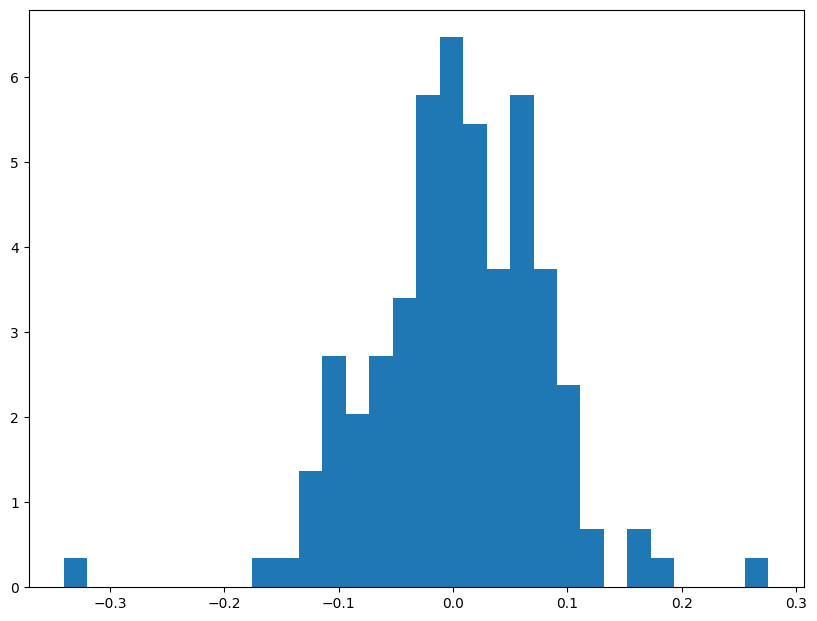

In [53]:
plt.figure(figsize=(10,7.5))
plt.hist(monthly,bins=30,density=True)
plt.show()

In [54]:
monthmean= np.mean(monthly['returns'])
monthvol = np.std(monthly['returns'])

print(monthmean, monthvol)

0.004268738223036954 0.07584956546604808


In [64]:
def stonkVAR(principalamt,meanret,volatility,riskpercent=1):
   logVAR = norm.ppf(1-0.01*riskpercent)*volatility
   return principalamt*(1-np.exp(meanret-logVAR))

In [66]:
stonkVAR(100,monthmean,monthvol)

15.817551547016295